# Image compressions with K-Means

In [1]:
# Importing necessary libs and functs
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [2]:
plt.rcParams['figure.figsize']= (18,12)

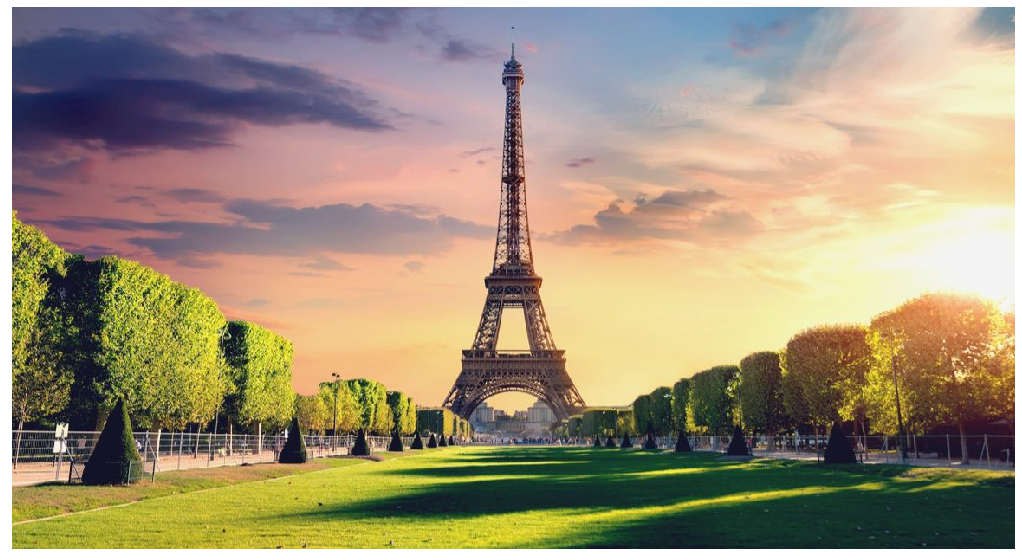

In [3]:
# Preprocessing : 
img = io.imread('images/Eiffel_Tower.jpg')
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(img);

In [4]:
img_data = (img / 255.0).reshape(-1,3)
img_data.shape

(727320, 3)

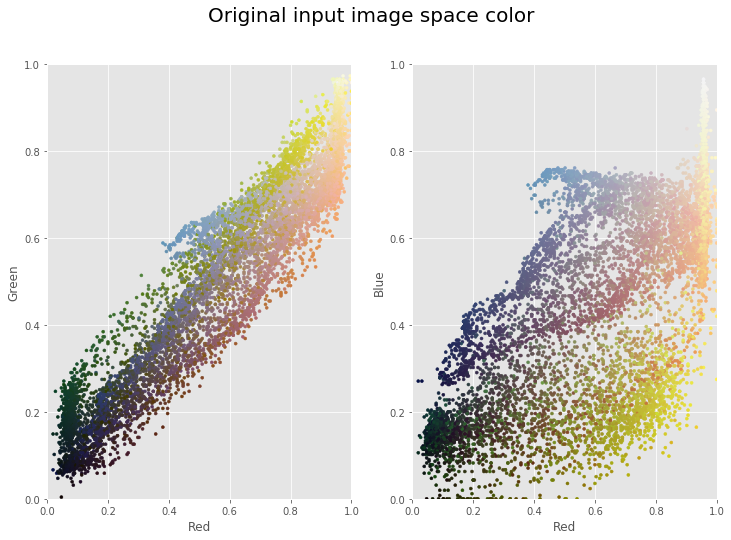

In [5]:
# Color space :
class plot_utils:
    def __init__(self, img_data, title, num_pixels=10000, colors=None):
        self.img_data = img_data
        self.title = title
        self.num_pixels = num_pixels
        self.colors = colors

    def colorSpace(self):
        if self.colors is None:
            self.colors = self.img_data

        rand = np.random.RandomState(42)
        index = rand.permutation(self.img_data.shape[0])[:self.num_pixels]
        colors = self.colors[index]
        R, G, B = self.img_data[index].T
        fig, ax = plt.subplots(1, 2, figsize=(12,8))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
        fig.suptitle(self.title, size=20)
x_img = plot_utils(img_data, title='Original input image space color')
x_img.colorSpace()

## Reducing color space with KMeans to k colors
### We take k = 32


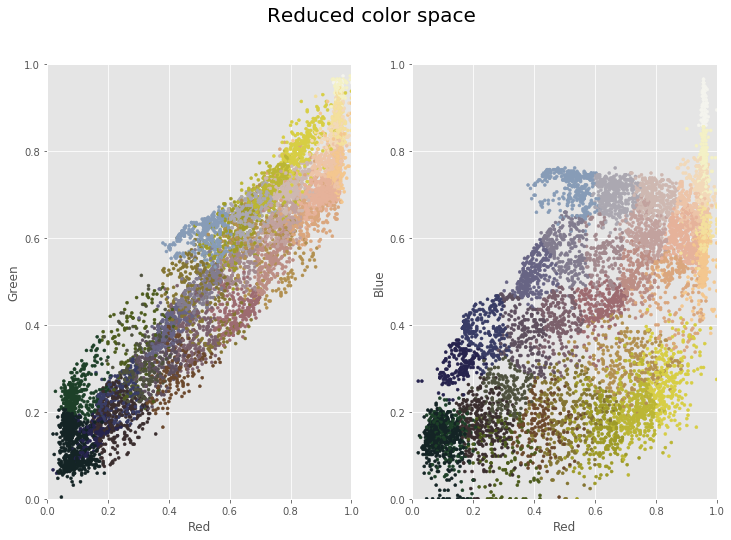

In [7]:
# We use MiniBatchKMeans from sklearn:
k = 32 # Number of colors after reduction
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(k).fit(img_data)
# Recolor pixels with KMeans result 
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
y_img = plot_utils(img_data,colors=k_colors,title="Reduced color space")
y_img.colorSpace()

# Interactive controls

In [8]:
# directory of the images
img_dir = 'images/'

In [9]:
@interact
def img_compression(image = os.listdir(img_dir), k = IntSlider( min=1, max=512, step=1, 
                                                             value=32, continuous_update=False,
                                                            layout = dict(width='80%'))):
    Input_img = io.imread(img_dir+image) #input image
    ## reshape 
    img_data = (Input_img / 255.0).reshape(-1,3)
    kmeans = MiniBatchKMeans(k).fit(img_data)
    # Recolor pixels with KMeans result 
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    result_image = np.reshape(k_colors,(Input_img.shape))
    
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.suptitle("KMeans img compression", fontsize=16)
    
    ax1.set_title("Compressed image")
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(result_image)
    ##
    ax2.set_title("Original image")
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(Input_img)
    
    plt.subplots_adjust(top=0.85)
    plt.show()

interactive(children=(Dropdown(description='image', options=('Eiffel_Tower.jpg', 'Makam_ElChahid.jpg', 'Versai…